# Moindres carrés
L'objectif de ce TP est de résoudre un système linéaire sur-déterminé, c'est-à-dire un système dans lequel le nombre d'équations est strictement supérieur au nombre d'inconnues.

In [5]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import sys

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Le problème des moindres carrés
Soit $A\in\mathcal{M}_{m, n}(\mathbb{R})$ une matrice réelle rectangulaire et $b\in\mathcal{M}_{m,1}(\mathbb{R})$ un vecteur. Si on suppose que $m > n$, alors l'équation linéaire $Ax = b$ n'admet pas de solution en général, car le système linéaire associé est sur-déterminé (la matrice $A$ a plus de lignes que de colonnes). 

A la place, on va chercher une solution du problème de minimisation suivant : 

$$
(\text{PMC}) \quad
\underset{x \in \mathcal{M}_{n,1}(\mathbb{R})}{\min} \|Ax-b\|_2
\,.$$

C'est le problème des moindres carrés (PMC) associé au système $Ax = b$. 
On notera $\mathcal{S}_{PMC}$ l'ensemble des solutions du PMC.

***
### Exemple
Un exemple de situation dans lequel on rencontre ce problème des moindres carrés et celui de la régression linéaire : étant donnés $m$ points de $\mathbb{R}^2$ notés $(x_{i},y_{i})_{1\leq i\leq m}$, on cherche la droite qui représente "au mieux" le nuage de points. Ce problème est assez naturel lorsque les données que l'on a (les points) sont des données expérimentales ou numériques : ces données ne sont connues qu'avec une incertitude. Il est alors souvent souhaitable de connaître la répartition de ces données sous la forme d'une courbe simple (ici une droite) plus une quantité la plus petite possible (dont on cherchera parfois à préciser la répartition).

En général, il est impossible de trouver une droite qui passe par tous ces points, mais on peut trouver la "meilleure" droite en résolvant le PMC associé au système $Ax = b$ où 

$$
A = \begin{pmatrix}
1 & x_{1} \\
\vdots & \vdots \\
1 & x_{m}
\end{pmatrix}\in\mathcal{M}_{m, 2}(\mathbb{R})
\,,\qquad 
b = \begin{pmatrix}
y_1 \\ \vdots \\ y_m
\end{pmatrix}\in\mathcal{M}_{m, 1}(\mathbb{R})
\,.$$

Essayons de justifier pourquoi le problème s'écrit de cette façon. Considérons une droite $D$ d'équation $y = \alpha x + \beta$ (nous n'autorisons donc pas les droites verticales dans cet exemple). Nous cherchons à déterminer les coefficients $\alpha$ et $\beta$ tels que

$$
\sum_{i=1}^m \vert y_i - \alpha x_i - \beta \vert^2
$$

soit minimal. Ceci revient exactement à dire que 

$$
\begin{pmatrix} \beta \\ \alpha \end{pmatrix} \in\mathcal{S}_{PMC}\,.
$$

Ici, nous essayons donc de minimiser la distance verticale entre le nuage de points et la droite (cf figure de gauche). Une autre façon de chercher la "meilleure" droite pourrait également être la recherche du minimum en échangeant les axes (c'est-à-dire que nous écrivons l'équation de la droite sous la forme $x = \alpha y + \beta$, ce qui revient à minimiser

$$
\sum_{i=1}^m |x_i - \alpha y_i - \beta|^2
\,.
$$

Ces deux problèmes ne sont pas équivalents et la droite solution n'est en général pas la même.

<img src="img/TP05_reg_lin.png", width='95%'>

Il est même possible de chercher une droite qui minimise la distance euclidienne entre le nuage de points et l'objet géométrique de la droite, c'est-à-dire sans privilégier l'axe des abscisses ou l'axe des ordonnées. Dans ce cas, la quantité à minimiser est la distance du nuage de points à la droite exprimée comme une projection orthogonale. Nous ne traiterons pas ce dernier problème dans ce TP.
***

En cours, le résultat suivant a été établi.

### Théorème
>Soient une matrice $A\in\mathcal{M}_{m,n}(\mathbb{R})$ et un vecteur $b\in\mathcal{M}_{m,1}(\mathbb{R})$. Un vecteur $x\in\mathcal{M}_{n,1}(\mathbb{R})$ est solution du problème des moindres carrés associé au système $Ax = b$ si et seulement s'il est solution du système des équations normales  
>
>$$A^TAx = A^Tb\,.$$

#### Remarque
D'un point de vue géométrique, un vecteur $x\in\mathcal{M}_{n,1}(\mathbb{R})$ est solution du problème des moindres carrés si et seulement si $Ax$ est la projection orthogonale de $b$ sur l'image de $A$. En d'autres termes, le vecteur $Ax-b$ doit être orthogonal à l'image de $A$. Algébriquement, cela se traduit par $$A^T(Ax-b)=0,$$ qui peut alors se récrire $$A^TAx = A^Tb.$$ On retrouve ainsi les équations normales.

De plus, vu la forme de la matrice $A$, le sous-espace $\text{Ker}(A^TA) = \text{Ker}\,A$ est nul dès que l'on a au moins deux points d'abscisses distinctes, ce qui est sûrement le cas. On en déduit que le PMC considéré possède une unique solution. 

Le problème des moindres carrés se réduit maintenant à la résolution d'un système linéaire de $n$ équations à $n$ inconnues. On peut alors utiliser les méthodes des TPs précédents.

#### Question 1
> Écrire une fonction `solve_mc_lu` qui prend en argument une matrice $A^TA$ réelle rectangulaire et un vecteur $b$, et qui résout le problème des moindres carrés, en utilisant la décomposition $LU$ de $A$ vue au TP 2.

In [6]:
help(np.linalg.solve)

Help on function solve in module numpy.linalg.linalg:

solve(a, b)
    Solve a linear matrix equation, or system of linear scalar equations.
    
    Computes the "exact" solution, `x`, of the well-determined, i.e., full
    rank, linear matrix equation `ax = b`.
    
    Parameters
    ----------
    a : (..., M, M) array_like
        Coefficient matrix.
    b : {(..., M,), (..., M, K)}, array_like
        Ordinate or "dependent variable" values.
    
    Returns
    -------
    x : {(..., M,), (..., M, K)} ndarray
        Solution to the system a x = b.  Returned shape is identical to `b`.
    
    Raises
    ------
    LinAlgError
        If `a` is singular or not square.
    
    Notes
    -----
    
    .. versionadded:: 1.8.0
    
    Broadcasting rules apply, see the `numpy.linalg` documentation for
    details.
    
    The solutions are computed using LAPACK routine _gesv
    
    `a` must be square and of full-rank, i.e., all rows (or, equivalently,
    columns) must be linea

In [7]:
def solve_mc_lu(A,b):
    L,U,ret = lu(A.T@A)
    
    B = A.T@b@np.linalg.inv(L)
    x = solve_triu(U,B)
    
    return x

In [8]:
A = np.floor(100 * rd.random([5,3]))
b = np.ones(5)
print(A)
x = solve_mc_lu(A,b)
print(x)
print(" ")
print(A.T@A@x)
print(A.T@b)

[[26. 61. 61.]
 [32. 34. 29.]
 [86. 34.  3.]
 [55. 95. 15.]
 [ 2. 61. 20.]]


NameError: name 'lu' is not defined

In [ ]:
def solve_triu(T,b):
    n,p = T.shape
    x = np.zeros(n)
    x[n-1] = b[n-1]/T[n-1,n-1]
    for i in range(2,n+1):
        x[n-i] = x[n-(i-1)] + b[n-i]/T[n-i,n-1]
    return x

def solve_tril(T,b):
    n,p = T.shape
    x = np.zeros(n)
    x[0] = b[0]/T[0,0]
    for i in range(1,n):
        x[i] = x[i-1] + b[i]/T[i,i]
    return x

def solve(A,b):
    L,U,ret = lu(A)
    x = solve_triu(U,b@np.linalg.inv(L))

In [9]:
def lu(A):
    n = np.shape(A)[0]
    L = np.eye(n)
    U = np.zeros((n,n))
    taille = np.shape(A)
    if(np.size(A) == 1):
        if(A[0]==0):
            print("Matrice taille 1 de coef nul")
            return L,U,False
        L = 1 
        U = A
        #print("ICIII")
        return L,U,True
    if(taille[0]!=taille[1]):
        print("La matrice n'est pas carré")
        return L,U,False
    
    if(A[0,0]==0):
        print("Matrice non completement régulière")
        return L,U,False
        
    i=1
    #print(i)
    i = i+1
    a = A[0,0]
    b = A[0,1:]
    c = A[1:,0]
    #A2 = [1:,0]
    
    U[0,:] = A[0,:]
    L[1:,0] = A[1:,0]/a
    L[1:,1:],U[1:,1:],ret = lu(A[1:,1:] - np.outer(L[1:,0],U[0,1:]))
    
    return L,U,ret

In [10]:
AA = 2*np.eye(5,4)
print(AA)
L,U,ret = lu(AA)
print(L)
print(" ")
print(U)

[[2. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 2.]
 [0. 0. 0. 0.]]
La matrice n'est pas carré
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
 
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


#### Question 2
> Écrire une fonction `solve_mc_qr` qui prend en argument une matrice $A$ réelle rectangulaire et un vecteur $b$, et qui résout le problème des moindres carrés en utilisant la décomposition $QR$ de $A^TA$ vue au TP 4.

In [11]:
def QR(A):
    n, p = A.shape
    Q = np.zeros((n,p))
    R = np.zeros((n,p))
    
    if(np.linalg.det==0):
        return Q,R,False
    
    qp = np.zeros((n,n))
    
    if(n!=p):
        return Q,R,False
    
    sum = 0
    
    #if()
    
    Q[:,0] = (A[:,0])/np.linalg.norm(A[:,0])
    #(np.sqrt(A[:,0]@A[:,0].T))
    
    #for i in range(1,n):
     #   q1 = A[:,i].T @ Q[:,i-1]
      #  q2 = A[:,i] - q1*Q[:,i-1] 
       # Q[:,i] = q2 / (np.linalg.norm(q2))
        #print(q1)
    

    
    for j in range(1,n):
                
        for i in range (1,j-1):
            sum = (A[:,j].T @ Q[:,i]) * Q[:,i]            
            
            if(i==j):
                R[i,j] = np.linalg.norm(qp[:,j])
            if(i>j):
                R[i,j] = 0
            if(i<j):
                R[i,j] = A[:,j].T @ Q[:,i]
                
        qp[j] = A[:,j] - sum
        Q[:,j] = ((np.linalg.norm(qp[:,j]))**-1) * qp[:,j]
                
        
    #R = Q.T @ A
            
    return Q, R, True

In [12]:
def solve_mc_qr(A,b):
    Q,R,ret = QR(A)
    B = A.T@b@Q.T
    
    x = np.linalg.solve(A,B)
    
    return x


In [13]:
A = np.floor(100 * rd.random([5,3]))
b = np.ones(5)
print(A)
x = solve_mc_qr(A,b)
print(x)
print(" ")
print(A.T@A@x)
print(A.T@b)

[[92. 28. 13.]
 [56. 35. 85.]
 [82. 34. 74.]
 [89. 18.  1.]
 [43. 70. 52.]]


LinAlgError: Last 2 dimensions of the array must be square

#### Question 3
> Écrire une fonction `solve_mc` qui prend en argument un matrice $A$ réelle rectangulaire, un vecteur $b$, et une chaine de caractère `solveur` et qui résout le problème des moindres carrés en utilisant la décomposition $LU$ de $A$ si `solveur='lu'` ou la décomposition $QR$ de $A$ si `solveur='qr'`.

## Application à la régression linéaire
Afin de tester la fonction `solve_mc`, nous allons nous intéresser à la regression linéaire. Pour cela, nous commençons par construire des données aléatoires, censées représenter un nuage de points de $\mathbb{R}^2$ pour lequel nous chercherons à effectuer une régression linéaire.

#### Question 4
> Construire une fonction `generer_donnees_lineaires` qui prend en argument $m$ un entier, $a$, $b$ et $c$ des réels et qui retourne :
>* $(x_i)_{1\leq i \leq m}$, une discrétisation de l'intervalle $[0,1]$ en $m$ points équi-répartis,
>* $(y_i)_{1\leq i \leq m}$, les ordonnées des points, de la forme 
>
>$$y_i = a x_i + b + c\varepsilon_i,$$ 
>
>où $\varepsilon_i$ est un nombre aléatoire de loi uniforme sur $[-1,1]$. Les réels $a$ et $b$ représentent le coefficient directeur et l'ordonnée à l'origine de la droite sur laquelle les données sont réparties en moyenne. Le réel $c$ permet de jouer sur l'éloignement des données à la droite d'équation $y=ax+b$. 

Voilà ce que l'on peut obtenir avec $m=100$, $a=1$, $b=1.2$ et $c=0.2$ : 
<img src="img/TP05_donnees_lineaires.png", width='45%'>

In [22]:
help(rd.random)
print((-2) * rd.random(1) + 1 )

Help on built-in function random_sample:

random_sample(...) method of mtrand.RandomState instance
    random_sample(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0).
    
    Results are from the "continuous uniform" distribution over the
    stated interval.  To sample :math:`Unif[a, b), b > a` multiply
    the output of `random_sample` by `(b-a)` and add `a`::
    
      (b - a) * random_sample() + a
    
    Parameters
    ----------
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    
    Returns
    -------
    out : float or ndarray of floats
        Array of random floats of shape `size` (unless ``size=None``, in which
        case a single float is returned).
    
    Examples
    --------
    >>> np.random.random_sample()
    0.47108547995356098
    >>> type(np.random.random_

In [23]:
def generer_donnees_lineaires(m,a,b,c):
    x = np.linspace(0,1,m)
    
    y = a*x + b + c*((-2) * rd.random(m) + 1)
    
    return x,y

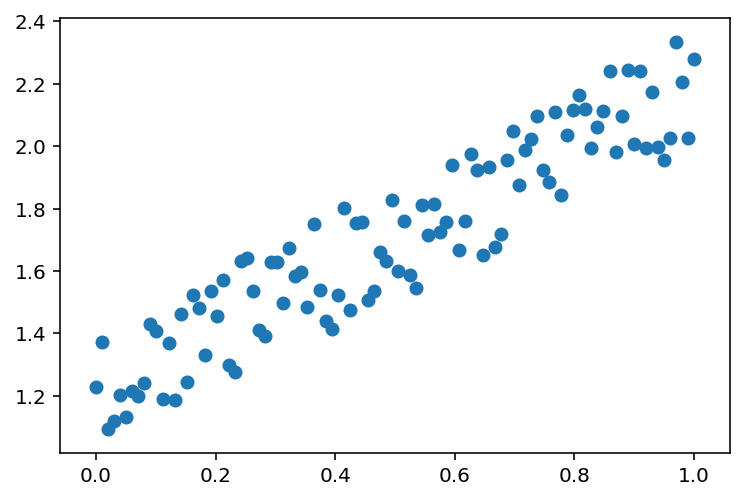

In [24]:
x,y = generer_donnees_lineaires(100,1,1.2,0.2)
plt.figure(1)
plt.scatter(x,y)

#### Question 5
> Proposer une fonction `regression_lineaire` qui prend en argument $m$ couples de points $(x_i,y_i)_{1\leq i \leq m}$ et qui réalise une régression linéaire en résolvant le PMC associé au système $Ax = b$ où 
>
> $$
A = \begin{pmatrix}
1 & x_{1} \\
\vdots & \vdots \\
1 & x_{m}
\end{pmatrix}\in\mathcal{M}_{m, 2}(\mathbb{R})
\,,\qquad 
b = \begin{pmatrix}
y_1 \\ \vdots \\ y_m
\end{pmatrix}\in\mathcal{M}_{m, 1}(\mathbb{R})
\,.$$

Voilà ce que l'on peut obtenir avec $m=100$, $a=0.5$, $b=1$ et $c=0.1$ :
<img src="img/TP05_regression_lineaire.png", width='45%'>

In [25]:
A = np.array([np.ones(np.size(x)),x])
print(A)


[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.   

In [26]:
def regression_lineaire(x,y):
    A = np.array([np.ones(np.size(x)),x]).T
    X = np.linalg.solve(A.T@A,A.T@y)
    
    return X   
    

[1.20719461 0.99726049]


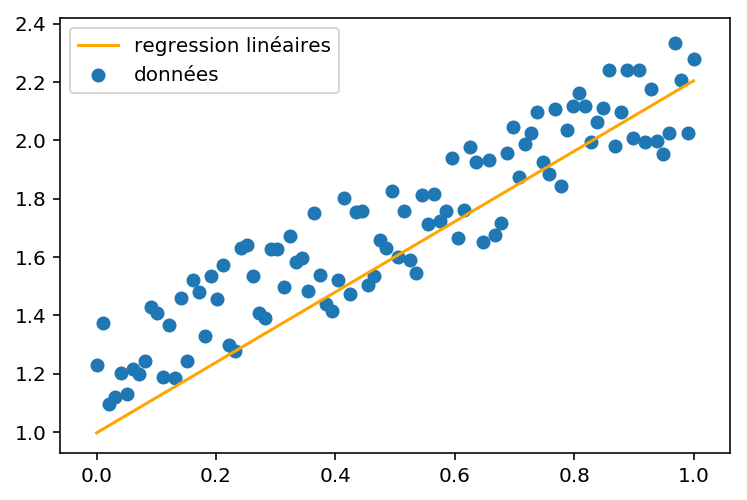

In [27]:
X1 = regression_lineaire(x,y)

plt.figure(1)
plt.plot(x,X1[0]*x+X1[1],'orange',label="regression linéaires")
plt.scatter(x,y,label ="données")
plt.legend()

print(X1)

#### Question 6
> Comparer la droite obtenue avec le résultat de la fonction `polyfit` du package `numpy`.

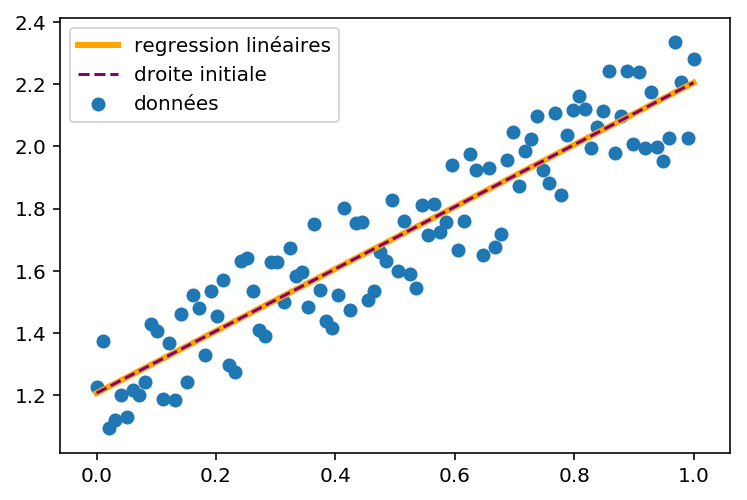

In [35]:
#help(np.polyfit)
T = np.polyfit(x,y,1)

plt.plot(x,X1[1]*x+X1[0],'orange',linewidth = 3,label="regression linéaires")
plt.scatter(x,y,label ="données")
plt.plot(x,T[0]*x+T[1],"purple",linestyle = 'dashed',label="droite initiale")
plt.legend()

#### Question 7
> En se basant sur l'exemple de code ci-dessous, comparer les temps d'exécution de la fonction `solve_mc` (pour chacun des solveurs $LU$ et $QR$) avec le temps d'exécution de la fonction `polyfit`de `numpy`.

In [21]:
import time
t = time.time()
a = rd.rand(10,10)
dt = time.time()-t
print("Temps d'exécution : {0:10.3e} s.".format(dt))

Temps d'exécution :  2.015e-04 s.


## Régression polynomiale (Facultatif)

Supposons que le nuage de points de $\mathbb{R}^2$ ne se répartit pas bien selon une droite mais plutôt selon un polynôme de degré plus grand. Nous pouvons poursuivre le même raisonnement en cherchant à minimiser la distance du nuage de points à une courbe polynomiale de degré 2 ou plus. 

Précisons ce que l'on souhaite. Nous supposons que nous avons $m$ points $(x_i,y_i)_{1\leq i\leq m}$. Nous cherchons un polynôme $P\in\mathbb{R}_p[X]$ tel que

$$
S(P) = \sum_{i=1}^m | y_i - P(x_i) |^2
$$

soit minimal. Si nous fixons $p=1$, cela revient à faire une régression linéaire. Mais si nous fixons $p>1$, cela autorise d'autres polynômes (ce qui fera nécessairement diminuer la distance au nuage de points).

Evidemment, il est possible d'aller jusqu'à $p=m-1$, ce qui revient (on peut s'en convaincre facilement) à faire de l'interpolation de Lagrange. Pour $p\geq m$, le problème n'est plus sur-déterminé mais sous-déterminé et la solution qui conduit à $S(P)=0$ n'est plus unique.

#### Question 8

> Ecrire le problème linéaire qu'il faut résoudre au sens des moindres carrés dans le cas général $p\geq 1$. Implémenter une fonction `regression_polynomiale` qui prend en argument 
>* $x$ et $y$ les vecteurs des coordonnées des points du nuage, 
>* $p$ le degré du polynôme cherché, 
>* `solver` la chaine de caractères précisant le solveur à utiliser pour résoudre le système des équations normales,
>* $xx$ un vecteur où est évalué le polynôme trouvé
>
> et qui retourne $yy$ un vecteur de la même taille que $xx$ et un booléen précisant si le calcul s'est bien passé.

#### Question 9

> Tester la fonction en traçant dans une même fenêtre graphique différentes régressions polynomiales, en prenant comme nuage des points équi-répartis sur le graphe de l'application 
$$ x \mapsto \frac{100}{10+(10x+1)^2}, \qquad -1\leq x\leq 1.$$
Que se passe-t-il lorsque $m$ augmente ?